In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 1], [0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 1, 1], [0, 0, 1, 1]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.43371 stdev: 0.14332
Best fitness: 0.78417 - size: (2, 13) - species 1 - id 86
Average adjusted fitness: 0.210
Mean genetic distance 2.848, standard deviation 0.492
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 20.712 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56890 stdev: 0.14198
Best fitness: 0.78417 - size: (2, 13) - species 8 - id 86
Average adjusted fitness: 0.265
Mean genetic distance 2.978, standard deviation 0.504
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.603 sec (21.157 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58861 stdev: 0.14751
Best fitness: 0.78417 - size: (2, 13) - species 18 - id 86
Average adjusted fitness: 0.293
Mean genetic distance 3.000, standard deviation 0.484
Population of 203 members in 28 species
Total extinct

Population's average fitness: 0.67268 stdev: 0.12343
Best fitness: 0.84354 - size: (8, 22) - species 28 - id 3234
Average adjusted fitness: 0.366
Mean genetic distance 3.230, standard deviation 0.515
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 44.778 sec (32.847 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64552 stdev: 0.15050
Best fitness: 0.84354 - size: (8, 22) - species 28 - id 3234
Average adjusted fitness: 0.358
Mean genetic distance 3.237, standard deviation 0.528
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 37.846 sec (34.202 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63631 stdev: 0.15345
Best fitness: 0.84354 - size: (8, 22) - species 28 - id 3234
Average adjusted fitness: 0.355
Mean genetic distance 3.243, standard deviation 0.516
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 36.453 sec (34.637 average)

 

Population's average fitness: 0.67326 stdev: 0.15124
Best fitness: 0.86456 - size: (10, 29) - species 37 - id 6186
Average adjusted fitness: 0.367
Mean genetic distance 3.313, standard deviation 0.538
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 39.922 sec (40.660 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.67937 stdev: 0.14412
Best fitness: 0.86456 - size: (10, 29) - species 37 - id 6186
Average adjusted fitness: 0.373
Mean genetic distance 3.335, standard deviation 0.538
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 40.539 sec (40.717 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.67109 stdev: 0.14936
Best fitness: 0.86456 - size: (10, 29) - species 37 - id 6186
Average adjusted fitness: 0.388
Mean genetic distance 3.322, standard deviation 0.532
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 40.206 sec (40.573 average)

Population's average fitness: 0.67416 stdev: 0.15477
Best fitness: 0.86704 - size: (11, 27) - species 48 - id 9141
Average adjusted fitness: 0.367
Mean genetic distance 3.311, standard deviation 0.584
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 49.335 sec (44.357 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.65516 stdev: 0.16745
Best fitness: 0.86704 - size: (11, 27) - species 48 - id 9141
Average adjusted fitness: 0.466
Mean genetic distance 3.293, standard deviation 0.556
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 53.969 sec (45.513 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.64907 stdev: 0.17134
Best fitness: 0.86704 - size: (11, 27) - species 48 - id 9141
Average adjusted fitness: 0.367
Mean genetic distance 3.289, standard deviation 0.567
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 47.594 sec (45.999 average)

Population's average fitness: 0.66105 stdev: 0.15807
Best fitness: 0.86704 - size: (10, 31) - species 63 - id 11985
Average adjusted fitness: 0.406
Mean genetic distance 3.242, standard deviation 0.602
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 39.762 sec (38.772 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.66604 stdev: 0.15747
Best fitness: 0.86704 - size: (10, 31) - species 63 - id 11985
Average adjusted fitness: 0.418
Mean genetic distance 3.258, standard deviation 0.613
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 39.573 sec (38.873 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.65903 stdev: 0.15882
Best fitness: 0.86704 - size: (10, 31) - species 63 - id 11985
Average adjusted fitness: 0.375
Mean genetic distance 3.205, standard deviation 0.639
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 40.006 sec (39.038 avera

Population's average fitness: 0.68940 stdev: 0.13684
Best fitness: 0.86889 - size: (12, 29) - species 48 - id 18215
Average adjusted fitness: 0.432
Mean genetic distance 2.965, standard deviation 0.629
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 37.385 sec (39.390 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.67828 stdev: 0.14654
Best fitness: 0.86889 - size: (12, 29) - species 48 - id 18215
Average adjusted fitness: 0.378
Mean genetic distance 2.967, standard deviation 0.616
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 38.348 sec (39.318 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.68228 stdev: 0.15241
Best fitness: 0.86889 - size: (13, 32) - species 74 - id 19383
Average adjusted fitness: 0.384
Mean genetic distance 3.010, standard deviation 0.617
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 38.720 sec (39.321 ave

Population's average fitness: 0.66001 stdev: 0.18821
Best fitness: 0.86951 - size: (14, 36) - species 71 - id 20641
Average adjusted fitness: 0.367
Mean genetic distance 2.977, standard deviation 0.495
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 40.570 sec (41.031 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.70288 stdev: 0.14869
Best fitness: 0.86951 - size: (14, 36) - species 71 - id 20641
Average adjusted fitness: 0.434
Mean genetic distance 3.000, standard deviation 0.489
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 41.589 sec (41.243 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.65438 stdev: 0.19242
Best fitness: 0.86951 - size: (14, 36) - species 71 - id 20641
Average adjusted fitness: 0.437
Mean genetic distance 3.016, standard deviation 0.504
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 41.586 sec (41.449 ave

Population's average fitness: 0.58521 stdev: 0.06236
Best fitness: 0.71243 - size: (3, 16) - species 1 - id 1190
Average adjusted fitness: 0.140
Mean genetic distance 3.218, standard deviation 0.509
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 25.057 sec (24.015 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58499 stdev: 0.06654
Best fitness: 0.72542 - size: (4, 17) - species 1 - id 2651
Average adjusted fitness: 0.190
Mean genetic distance 3.194, standard deviation 0.510
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 26.139 sec (24.314 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.59109 stdev: 0.06350
Best fitness: 0.72542 - size: (4, 17) - species 1 - id 2651
Average adjusted fitness: 0.191
Mean genetic distance 3.235, standard deviation 0.514
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 25.944 sec (24.524 average)

 ***

Population's average fitness: 0.60423 stdev: 0.07963
Best fitness: 0.78788 - size: (5, 18) - species 9 - id 5358
Average adjusted fitness: 0.151
Mean genetic distance 3.348, standard deviation 0.510
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 29.154 sec (28.079 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.61438 stdev: 0.07448
Best fitness: 0.78788 - size: (5, 18) - species 9 - id 5358
Average adjusted fitness: 0.161
Mean genetic distance 3.347, standard deviation 0.518
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 29.194 sec (28.225 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.61604 stdev: 0.07662
Best fitness: 0.78788 - size: (5, 18) - species 9 - id 5358
Average adjusted fitness: 0.223
Mean genetic distance 3.332, standard deviation 0.527
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 28.461 sec (28.366 average)

 ***

Population's average fitness: 0.62891 stdev: 0.09155
Best fitness: 0.78788 - size: (5, 18) - species 9 - id 5358
Average adjusted fitness: 0.202
Mean genetic distance 3.288, standard deviation 0.548
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 35.778 sec (32.951 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.63128 stdev: 0.09577
Best fitness: 0.78788 - size: (5, 18) - species 9 - id 5358
Average adjusted fitness: 0.263
Mean genetic distance 3.295, standard deviation 0.565
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 35.107 sec (33.266 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.62594 stdev: 0.09039
Best fitness: 0.78788 - size: (5, 18) - species 9 - id 5358
Average adjusted fitness: 0.170
Mean genetic distance 3.292, standard deviation 0.556
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 33.331 sec (33.380 average)

 ***

Population's average fitness: 0.63550 stdev: 0.09946
Best fitness: 0.79221 - size: (5, 18) - species 9 - id 12152
Average adjusted fitness: 0.220
Mean genetic distance 3.255, standard deviation 0.571
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 35.393 sec (35.756 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.62915 stdev: 0.09822
Best fitness: 0.79221 - size: (5, 18) - species 9 - id 12152
Average adjusted fitness: 0.224
Mean genetic distance 3.243, standard deviation 0.592
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 36.122 sec (35.820 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.62451 stdev: 0.09945
Best fitness: 0.79221 - size: (5, 18) - species 9 - id 12152
Average adjusted fitness: 0.218
Mean genetic distance 3.225, standard deviation 0.576
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 36.230 sec (35.910 average)

 

Population's average fitness: 0.62484 stdev: 0.10248
Best fitness: 0.80272 - size: (7, 24) - species 9 - id 14046
Average adjusted fitness: 0.203
Mean genetic distance 3.067, standard deviation 0.602
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 38.741 sec (38.886 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.64049 stdev: 0.09941
Best fitness: 0.80272 - size: (7, 24) - species 9 - id 14046
Average adjusted fitness: 0.212
Mean genetic distance 3.060, standard deviation 0.566
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 40.722 sec (39.180 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.63122 stdev: 0.10188
Best fitness: 0.80272 - size: (7, 24) - species 9 - id 14046
Average adjusted fitness: 0.203
Mean genetic distance 3.067, standard deviation 0.551
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 39.092 sec (39.374 average)


Population's average fitness: 0.62159 stdev: 0.09317
Best fitness: 0.80272 - size: (7, 24) - species 9 - id 14046
Average adjusted fitness: 0.163
Mean genetic distance 2.967, standard deviation 0.526
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 46.062 sec (43.714 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.62652 stdev: 0.09937
Best fitness: 0.80272 - size: (7, 24) - species 9 - id 14046
Average adjusted fitness: 0.298
Mean genetic distance 2.993, standard deviation 0.523
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 46.774 sec (44.239 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.62088 stdev: 0.09690
Best fitness: 0.80272 - size: (7, 24) - species 9 - id 14046
Average adjusted fitness: 0.191
Mean genetic distance 3.039, standard deviation 0.563
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 48.315 sec (44.991 average)


Population's average fitness: 0.60430 stdev: 0.07560
Best fitness: 0.76129 - size: (8, 24) - species 38 - id 1438
Average adjusted fitness: 0.237
Mean genetic distance 3.115, standard deviation 0.484
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 25.955 sec (24.854 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60772 stdev: 0.07944
Best fitness: 0.76129 - size: (8, 24) - species 38 - id 1438
Average adjusted fitness: 0.299
Mean genetic distance 3.137, standard deviation 0.487
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 26.927 sec (25.154 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60755 stdev: 0.07681
Best fitness: 0.76129 - size: (8, 24) - species 38 - id 1438
Average adjusted fitness: 0.273
Mean genetic distance 3.146, standard deviation 0.490
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 27.149 sec (25.482 average)

 

Population's average fitness: 0.62908 stdev: 0.08618
Best fitness: 0.77180 - size: (7, 29) - species 10 - id 4881
Average adjusted fitness: 0.294
Mean genetic distance 3.300, standard deviation 0.526
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 30.849 sec (30.384 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.62621 stdev: 0.08739
Best fitness: 0.77180 - size: (7, 29) - species 10 - id 4881
Average adjusted fitness: 0.199
Mean genetic distance 3.297, standard deviation 0.535
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 32.777 sec (30.732 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.63378 stdev: 0.09012
Best fitness: 0.77180 - size: (7, 29) - species 10 - id 4881
Average adjusted fitness: 0.262
Mean genetic distance 3.297, standard deviation 0.527
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 30.575 sec (30.706 average)

 

Population's average fitness: 0.61245 stdev: 0.09018
Best fitness: 0.79344 - size: (10, 29) - species 7 - id 6981
Average adjusted fitness: 0.200
Mean genetic distance 3.255, standard deviation 0.579
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 33.362 sec (32.651 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.61561 stdev: 0.09136
Best fitness: 0.79344 - size: (10, 29) - species 7 - id 6981
Average adjusted fitness: 0.264
Mean genetic distance 3.244, standard deviation 0.588
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 33.471 sec (32.828 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.61421 stdev: 0.08667
Best fitness: 0.79344 - size: (10, 29) - species 7 - id 6981
Average adjusted fitness: 0.224
Mean genetic distance 3.237, standard deviation 0.580
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 34.837 sec (33.121 average)

 

Population's average fitness: 0.63087 stdev: 0.09086
Best fitness: 0.79344 - size: (10, 29) - species 7 - id 6981
Average adjusted fitness: 0.261
Mean genetic distance 3.046, standard deviation 0.566
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 36.131 sec (36.186 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.63165 stdev: 0.09498
Best fitness: 0.79344 - size: (10, 29) - species 7 - id 6981
Average adjusted fitness: 0.297
Mean genetic distance 3.045, standard deviation 0.574
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 36.667 sec (36.449 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.63554 stdev: 0.08821
Best fitness: 0.79344 - size: (10, 29) - species 7 - id 6981
Average adjusted fitness: 0.200
Mean genetic distance 3.063, standard deviation 0.588
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 36.222 sec (36.481 average)

 

Population's average fitness: 0.63406 stdev: 0.09525
Best fitness: 0.79344 - size: (10, 29) - species 7 - id 6981
Average adjusted fitness: 0.252
Mean genetic distance 3.146, standard deviation 0.560
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 38.586 sec (37.874 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.62818 stdev: 0.09554
Best fitness: 0.79344 - size: (10, 29) - species 7 - id 6981
Average adjusted fitness: 0.210
Mean genetic distance 3.144, standard deviation 0.560
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 37.751 sec (37.994 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.63392 stdev: 0.09778
Best fitness: 0.79344 - size: (10, 29) - species 7 - id 6981
Average adjusted fitness: 0.306
Mean genetic distance 3.140, standard deviation 0.534
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 39.244 sec (38.224 average)


Population's average fitness: 0.65827 stdev: 0.09614
Best fitness: 0.82313 - size: (17, 44) - species 67 - id 19865
Average adjusted fitness: 0.242
Mean genetic distance 3.131, standard deviation 0.589
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 43.165 sec (41.037 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.64915 stdev: 0.09844
Best fitness: 0.82313 - size: (17, 44) - species 67 - id 19865
Average adjusted fitness: 0.271
Mean genetic distance 3.125, standard deviation 0.581
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 44.075 sec (41.520 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.64314 stdev: 0.10416
Best fitness: 0.82313 - size: (17, 44) - species 67 - id 19865
Average adjusted fitness: 0.202
Mean genetic distance 3.109, standard deviation 0.614
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 44.086 sec (41.954 ave

Population's average fitness: 0.57545 stdev: 0.09054
Best fitness: 0.74706 - size: (5, 20) - species 2 - id 804
Average adjusted fitness: 0.210
Mean genetic distance 3.069, standard deviation 0.453
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 26.097 sec (23.424 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58231 stdev: 0.09303
Best fitness: 0.74706 - size: (5, 20) - species 2 - id 804
Average adjusted fitness: 0.278
Mean genetic distance 3.082, standard deviation 0.441
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 24.183 sec (23.519 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58488 stdev: 0.08443
Best fitness: 0.74706 - size: (5, 20) - species 2 - id 804
Average adjusted fitness: 0.198
Mean genetic distance 3.096, standard deviation 0.455
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 24.517 sec (23.630 average)

 ****** R

Population's average fitness: 0.61997 stdev: 0.09035
Best fitness: 0.76500 - size: (5, 20) - species 33 - id 2550
Average adjusted fitness: 0.265
Mean genetic distance 3.259, standard deviation 0.480
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 28.304 sec (27.916 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.60679 stdev: 0.09945
Best fitness: 0.76500 - size: (5, 20) - species 33 - id 2550
Average adjusted fitness: 0.251
Mean genetic distance 3.242, standard deviation 0.496
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 27.929 sec (27.978 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.60844 stdev: 0.10204
Best fitness: 0.76500 - size: (5, 20) - species 33 - id 2550
Average adjusted fitness: 0.250
Mean genetic distance 3.272, standard deviation 0.498
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 27.924 sec (27.987 average)

 

Population's average fitness: 0.61738 stdev: 0.10403
Best fitness: 0.78541 - size: (6, 22) - species 33 - id 6555
Average adjusted fitness: 0.238
Mean genetic distance 3.258, standard deviation 0.574
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 34.480 sec (32.605 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.60497 stdev: 0.11842
Best fitness: 0.78541 - size: (6, 22) - species 33 - id 6555
Average adjusted fitness: 0.251
Mean genetic distance 3.260, standard deviation 0.566
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 33.477 sec (32.879 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.59389 stdev: 0.11456
Best fitness: 0.78541 - size: (6, 22) - species 33 - id 6555
Average adjusted fitness: 0.214
Mean genetic distance 3.236, standard deviation 0.583
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 34.360 sec (33.166 average)

 

Population's average fitness: 0.61685 stdev: 0.10531
Best fitness: 0.78541 - size: (6, 22) - species 33 - id 6555
Average adjusted fitness: 0.223
Mean genetic distance 3.122, standard deviation 0.618
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 34.394 sec (34.211 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.62023 stdev: 0.10821
Best fitness: 0.78541 - size: (6, 22) - species 33 - id 6555
Average adjusted fitness: 0.269
Mean genetic distance 3.124, standard deviation 0.610
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 36.820 sec (34.472 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.61759 stdev: 0.11150
Best fitness: 0.78541 - size: (6, 22) - species 33 - id 6555
Average adjusted fitness: 0.231
Mean genetic distance 3.091, standard deviation 0.599
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 35.512 sec (34.476 average)

 

Population's average fitness: 0.62119 stdev: 0.10891
Best fitness: 0.78541 - size: (6, 22) - species 33 - id 6555
Average adjusted fitness: 0.236
Mean genetic distance 2.976, standard deviation 0.585
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 34.825 sec (35.559 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.61255 stdev: 0.11250
Best fitness: 0.78541 - size: (6, 22) - species 33 - id 6555
Average adjusted fitness: 0.296
Mean genetic distance 2.959, standard deviation 0.603
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 35.982 sec (35.534 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.62942 stdev: 0.10615
Best fitness: 0.79035 - size: (8, 27) - species 54 - id 16092
Average adjusted fitness: 0.233
Mean genetic distance 3.002, standard deviation 0.593
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 37.656 sec (35.775 average)

Population's average fitness: 0.63890 stdev: 0.10789
Best fitness: 0.79468 - size: (10, 31) - species 54 - id 19501
Average adjusted fitness: 0.249
Mean genetic distance 3.073, standard deviation 0.566
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 39.587 sec (38.963 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.64146 stdev: 0.10877
Best fitness: 0.79468 - size: (10, 31) - species 54 - id 19501
Average adjusted fitness: 0.293
Mean genetic distance 3.088, standard deviation 0.571
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 40.149 sec (39.208 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.63102 stdev: 0.10459
Best fitness: 0.79468 - size: (10, 31) - species 54 - id 19501
Average adjusted fitness: 0.280
Mean genetic distance 3.081, standard deviation 0.564
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 39.390 sec (39.321 ave

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.5222222222222223

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  1  0  0  0  0  0  0  1  2]
 [ 0  7  5  3  0  0  0  7  1  0]
 [ 0  5  6  1  1  2  1  2  2  0]
 [ 0  1  5 11  0  0  0  0  2  0]
 [ 0  1  0  0 15  0  0  0  0  0]
 [ 0  1  0  1  2 14  1  4  2  3]
 [ 0  1  0  0  2  0 15  0  0  0]
 [ 0  0  1  0  0  0  0  5  2  1]
 [ 0  2  0  2  0  1  0  1  5 12]
 [ 0  0  0  0  0  1  1  0  2  0]]


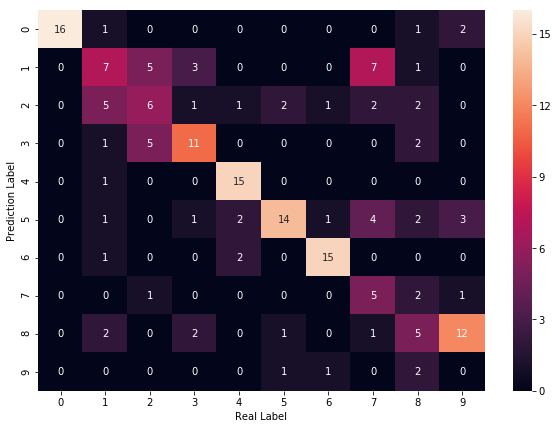

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[2] real:5
#1 min_error:0 index:[3] real:2
#2 min_error:0 index:[3] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:1 index:[1 6] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[3] real:3
#8 min_error:0 index:[1] real:2
#9 min_error:1 index:[1 6] real:1
#10 min_error:0 index:[5] real:7
#11 min_error:0 index:[5] real:4
#12 min_error:0 index:[6] real:6
#13 min_error:0 index:[3] real:3
#14 min_error:1 index:[1 6] real:1
#15 min_error:0 index:[8] real:3
#16 min_error:0 index:[5] real:9
#17 min_error:1 index:[1 6] real:1
#18 min_error:0 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[8] real:8
#21 min_error:1 index:[2 4] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:1 index:[1 6] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:1 index:[1 6] real:6
#29 min_error:1 index:[3 7 8] real:9
#3

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.5151515151515151
Avg Base Learner:0.8235930735930737


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.10555555555555556
Accuracy on training set: 0.19444444444444445
Accuracy on training set: 0.2722222222222222
Accuracy on training set: 0.39444444444444443


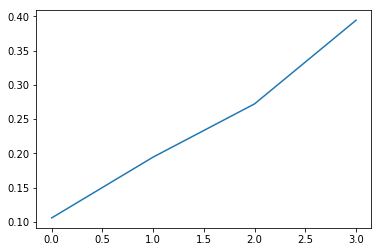

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.10555555555555556,
 0.19444444444444445,
 0.2722222222222222,
 0.39444444444444443]